Aluno : Pedro Siade Ferreira
Matricula : 202004734

In [192]:
%matplotlib inline
import cv2 # importa opencv
import numpy as np # importa numpy
import matplotlib.pyplot as plt
import sys
import math
import time

In [193]:

def filtroTamanhoArbitrario(img, filtro):
  M, N = img.shape
  K = int(math.floor(len(filtro[0]) / 2))
  L = int(math.floor(len(filtro) / 2))
  imgFiltrada = img.copy() #copia da imagem a fim de não modificar a principal e causar erros
  for v in range(L, N - L):   #Como range varia de L ate N-L-1, diferentemente do cod em java do livro, aqui será N-L
    for u in range(K, M - K):
      sum = 0
      for j in range(-L, L+1):
        for i in range(-K, K+1):
          p = img[u+i, v+j]
          c = filtro[j+L-1][i+K-1]
          sum = sum + (c * p)
      q = np.round(sum)
      if q < 0:
         q = 0
      elif q > 255:
         q = 255
      imgFiltrada[u, v] = q
  return imgFiltrada

In [194]:
def filtroTamanhoArbitrarioB(img, filtro):
  M, N = img.shape
  s = 1 / np.sum(filtro) #suma dos coeficientes da matriz do filtro a fim de normalizar a mesma
  K = int(math.floor(len(filtro[0]) / 2))
  L = int(math.floor(len(filtro) / 2))
  imgFiltrada = img.copy() #copia da imagem a fim de não modificar a principal e causar erros
  for v in range(L, N - L):   #Como range varia de L ate N-L-1, diferentemente do cod em java do livro, aqui será N-L
    for u in range(K, M - K):
      sum = 0
      for j in range(-L, L+1):
        for i in range(-K, K+1):
          p = img[u+i, v+j]
          c = filtro[j+L-1][i+K-1]
          sum = sum + (c * p)
      q = np.round(sum * s)
      if q < 0:
         q = 0
      elif q > 255:
         q = 255
      imgFiltrada[u, v] = q
  return imgFiltrada

In [195]:

def montarFiltroGaussiano(m,n, sigma):
  h = np.zeros((m,n), dtype = np.float32)
  a = (m-1)/2
  b = (n-1)/2
  for x in range(m):
        for y in range(n):
              h[x,y] =np.exp(-(((x-a)**2) + ((y-b)**2))/(2*(sigma**2)))
  h = h/np.sum(h)
  return h

In [196]:
def juntarImagens(img, img2):
    M, N = img.shape
    h = np.zeros((M,N), dtype = np.float32)
    h=img+img2
    return h


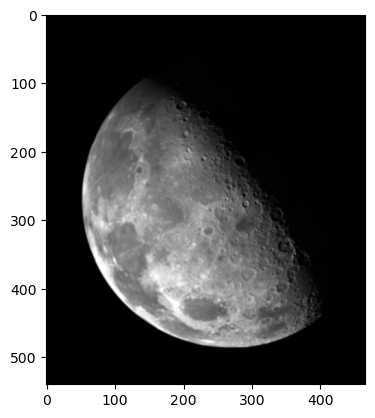

In [197]:
img = cv2.imread('imagens/Fig0338(a)(blurry_moon).tif', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

In [198]:
g55=montarFiltroGaussiano(5,5,1)
gaussiano= filtroTamanhoArbitrarioB(img, g55)

In [199]:
h1=np.array([
    [0, 0, 0,0,0],
    [0,0, 1, 0,0],
    [0,1,-4,1,0],
    [0,0,1,0,0],
    [0, 0, 0,0,0],
   ])

h0=np.array([
    [0, 1, 0],
    [1,-4,1],
    [0,1,0],
   ])



Resultado com a open cv a fim de obter a imagem 38.a:
Utilizando o filtro da imagem 37.a

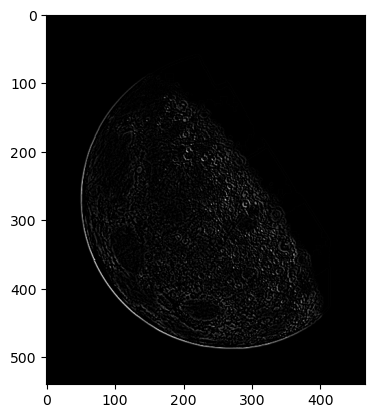

In [200]:
imgFiltrada0 = cv2.filter2D(src=img, ddepth=-1, kernel=h1)
plt.imshow(imgFiltrada0, cmap='gray')

Resultado com a mascara da figura a do código implementado:

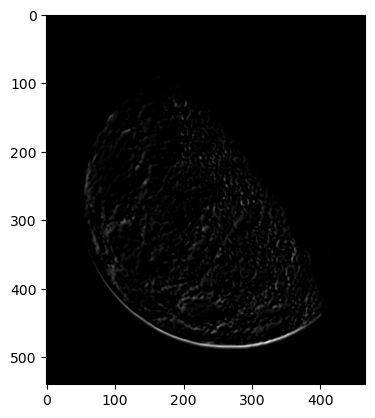

In [201]:
imgFiltrada1 = filtroTamanhoArbitrario(gaussiano, h0)
plt.imshow(imgFiltrada1, cmap='gray')

Após inumeras tentativas e lendo alguns materiais na internet sobre o assunto percebi que era necessário primeiramente aumentar a mascara gaussiana, haja vista que estava utilizando a 3X3. Depois disso, realizando alguns testes foi notado que preenchendo a matriz do laplaciano com 0, a fim de torna-la 5x5 como a mascara gaussiana, obtinha-se o resultado esperado.

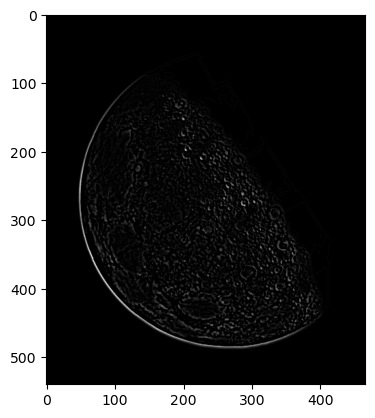

In [202]:
imgFiltrada1 = filtroTamanhoArbitrario(gaussiano, h1)
plt.imshow(imgFiltrada1, cmap='gray')

Resultado foi bem proximo do observado na open cv e no livro

In [203]:

def filtroTamanhoArbitrario2(img, filtro):
  M, N = img.shape
  K = int(math.floor(len(filtro[0]) / 2))
  L = int(math.floor(len(filtro) / 2))
  imgFiltrada = img.copy() #copia da imagem a fim de não modificar a principal e causar erros
  aux=0
  aux2=255
  for v in range(L, N - L):   #Como range varia de L ate N-L-1, diferentemente do cod em java do livro, aqui será N-L
    for u in range(K, M - K):
      sum = 0
      for j in range(-L, L+1):
        for i in range(-K, K+1):
          p = img[u+i, v+j]
          c = filtro[j+L-1][i+K-1]
          sum = sum + (c * p)
      q = np.round(sum)
      if q < aux:
            aux=q
      if q > aux2:
            aux2=q
      imgFiltrada[u, v] = q
  for v in range(L, N - L):   #Como range varia de L ate N-L-1, diferentemente do cod em java do livro, aqui será N-L
    for u in range(K, M - K):
        r = imgFiltrada[u, v] - aux
        x=255*r/aux2
        imgFiltrada[u, v] =x
        
  return imgFiltrada

Buscando chegar aos resultados da figura 37.c, realizou-se o seguinte algoritmo:

Somar o minimo a todos os pixels da imagem garantido que nem um pixel seja menor que zero. 
Posteriormente, multiplicar o pixel por 255(L-1) e dividir o mesmo pelo valor máximo encontrado em um pixel da imagem.
 
Com isso obteve-se os seguintes resultados:

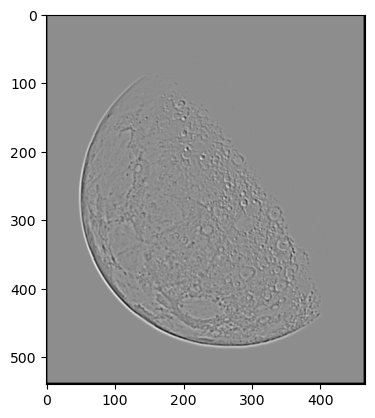

In [204]:
imgFiltrada3 = filtroTamanhoArbitrario2(gaussiano, h1)


plt.imshow(imgFiltrada3 , cmap='gray')

Percebe-se que o resultado foi bastante próximo ao do livro, ja que a imagem como no livro ficou cinza, bem como observou-se que as características dominantes da imagem são as bordas e as descontinuidades acentuadas de intensidade.

Juntando as imagens para imagem 3.38-d:
Primeiramente utilizando a open cv e depois os resultados obtidos por mim:

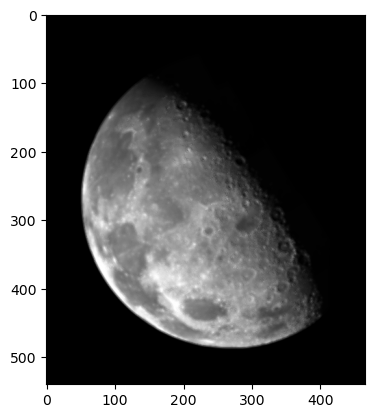

In [205]:
img5= juntarImagens(img, imgFiltrada0)
plt.imshow(img5, cmap='gray')


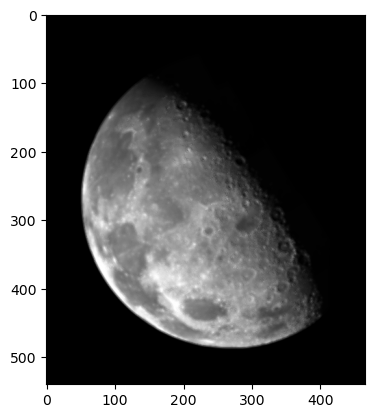

In [206]:
img6= juntarImagens(img, imgFiltrada1)
plt.imshow(img5, cmap='gray')

Juntando as imagens para imagem 3.38-e:
Primeiramente utilizando a open cv e depois os resultados obtidos por mim:

In [207]:
h3=np.array([
    [0,0,0,0,0],
    [0,1, 1, 1,0],
    [0,1,-8,1,0],
    [0,1,1,1,0],
    [0,0,0,0,0],
   ])


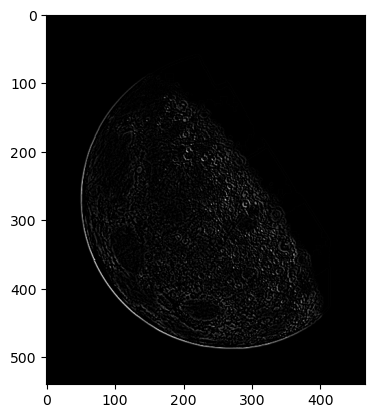

In [208]:
imgFiltrada7 = cv2.filter2D(src=img, ddepth=-1, kernel=h3)
plt.imshow(imgFiltrada0, cmap='gray')

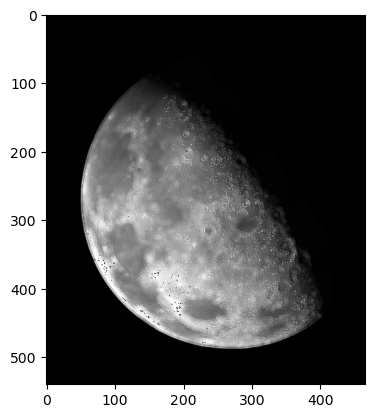

In [209]:
img8= juntarImagens(img, imgFiltrada7)

plt.imshow(img8, cmap='gray')


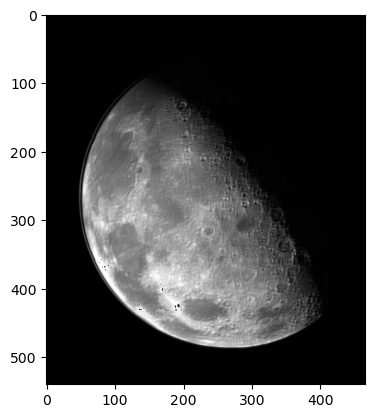

In [210]:
img6 = filtroTamanhoArbitrario(gaussiano, h3)
img7= juntarImagens(img, img6)

plt.imshow(img7, cmap='gray')


Percebe-se que nas figuras acima obteve resultados proximos ao do livro e da opencv concluindo que se chegou aos resultados esperados.

Na segunda parte, a qual para o aguçamento foi utilizado a máscara que considera a diagonal o resultado foi melhor, uma vez que houve um realce maior das bordas como também a nitidez da imagem foi melhorada. Logo, pode-se que concluir que os filtros de aguçamento que consideram a diagonal obtem-se resultados melhores. 